<a href="https://colab.research.google.com/github/teju3805/LLM/blob/main/Attention%20Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

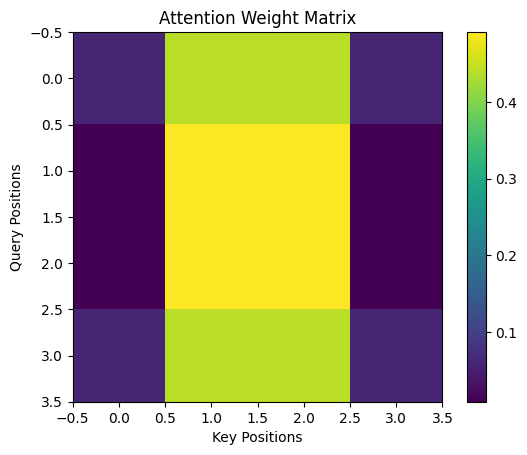

Query (Q):
 [[2 0 2 0]
 [0 4 0 4]
 [2 2 2 2]
 [0 2 0 2]]

Key (K):
 [[2 2 0 0]
 [0 0 4 4]
 [2 2 2 2]
 [0 0 2 2]]

Value (V):
 [[2 0 0 2]
 [0 4 4 0]
 [2 2 2 2]
 [0 2 2 0]]

Attention Weights:
 [[0.05960146 0.44039854 0.44039854 0.05960146]
 [0.0089931  0.4910069  0.4910069  0.0089931 ]
 [0.0089931  0.4910069  0.4910069  0.0089931 ]
 [0.05960146 0.44039854 0.44039854 0.05960146]]

Attention Output:
 [[1.         2.76159416 2.76159416 1.        ]
 [1.         2.96402758 2.96402758 1.        ]
 [1.         2.96402758 2.96402758 1.        ]
 [1.         2.76159416 2.76159416 1.        ]]


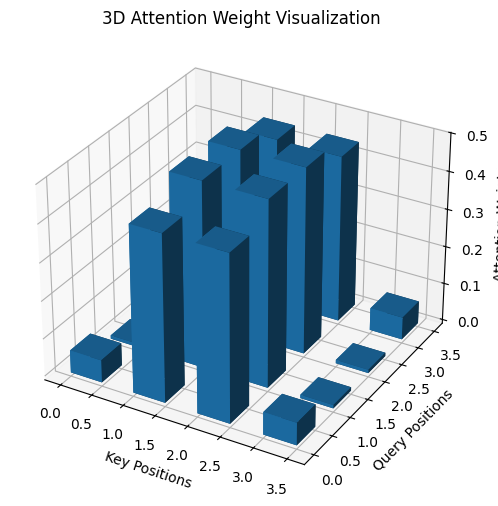

In [11]:
#question1
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Input embeddings
# ----------------------------
# Example sentence with 4 tokens, embedding size = 4
X = np.array([
    [1, 0, 1, 0],   # Token 1
    [0, 2, 0, 2],   # Token 2
    [1, 1, 1, 1],   # Token 3
    [0, 1, 0, 1]    # Token 4
])

# ----------------------------
# Step 2: Weight matrices
# ----------------------------
WQ = np.array([
    [1, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 0],
    [0, 1, 0, 1]
])

WK = np.array([
    [1, 1, 0, 0],
    [0, 0, 1, 1],
    [1, 1, 0, 0],
    [0, 0, 1, 1]
])

WV = np.array([
    [1, 0, 0, 1],
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

# ----------------------------
# Step 3: Compute Q, K, V
# ----------------------------
Q = X @ WQ
K = X @ WK
V = X @ WV

# ----------------------------
# Step 4: Scaled Dot-Product Attention
# ----------------------------
dk = K.shape[1]
scores = Q @ K.T / np.sqrt(dk)

# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=-1, keepdims=True)

attention_weights = softmax(scores)
output = attention_weights @ V

# ----------------------------
# Step 5: Visualization
# ----------------------------
plt.imshow(attention_weights)
plt.colorbar()
plt.title("Attention Weight Matrix")
plt.xlabel("Key Positions")
plt.ylabel("Query Positions")
plt.show()

# ----------------------------
# Print Results
# ----------------------------
print("Query (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", output)
from mpl_toolkits.mplot3d import Axes3D

# ----------------------------
# 3D Visualization of Attention Weights
# ----------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

num_queries, num_keys = attention_weights.shape

x_pos, y_pos = np.meshgrid(
    np.arange(num_keys),
    np.arange(num_queries)
)

x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

dx = dy = 0.5
dz = attention_weights.flatten()

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz)

ax.set_xlabel("Key Positions")
ax.set_ylabel("Query Positions")
ax.set_zlabel("Attention Weight")
ax.set_title("3D Attention Weight Visualization")

plt.show()


In [2]:
import tensorflow as tf
import math

class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, embed_dim):
        super(SelfAttention, self).__init__()
        self.embed_dim = embed_dim

        self.W_Q = tf.keras.layers.Dense(embed_dim, use_bias=False)
        self.W_K = tf.keras.layers.Dense(embed_dim, use_bias=False)
        self.W_V = tf.keras.layers.Dense(embed_dim, use_bias=False)

    def call(self, x):
        # x shape: (batch_size, seq_len, embed_dim)

        Q = self.W_Q(x)
        K = self.W_K(x)
        V = self.W_V(x)

        scores = tf.matmul(Q, K, transpose_b=True) / math.sqrt(self.embed_dim)
        attention_weights = tf.nn.softmax(scores, axis=-1)

        output = tf.matmul(attention_weights, V)
        return output, attention_weights


# -----------------------------
# Example input
# -----------------------------
batch_size = 1
seq_len = 4
embed_dim = 8

x = tf.random.uniform((batch_size, seq_len, embed_dim))

self_attention = SelfAttention(embed_dim)
output, attn_weights = self_attention(x)

print("Attention Weights:\n", attn_weights.numpy())
print("\nOutput:\n", output.numpy())


Attention Weights:
 [[[0.18924047 0.3061241  0.23949812 0.2651374 ]
  [0.18628025 0.34466803 0.2437954  0.22525632]
  [0.20658475 0.29158267 0.24983278 0.25199977]
  [0.2123111  0.30265313 0.24328008 0.2417557 ]]]

Output:
 [[[-0.52259314  0.3599816  -0.9971168  -0.5300219   0.51182145
    1.1117469   0.45277306 -0.06432615]
  [-0.51887214  0.3648343  -1.0162647  -0.5040823   0.52146137
    1.1126286   0.4914444  -0.07995011]
  [-0.52326983  0.3517686  -1.001433   -0.5261855   0.5202991
    1.0978061   0.4507592  -0.0581387 ]
  [-0.51736486  0.35361418 -1.0084804  -0.52056116  0.52004874
    1.0945165   0.45927227 -0.05989103]]]


In [4]:
#question3
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# -------------------------------
# Multi-Head Self-Attention
# -------------------------------
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.W_Q = nn.Linear(embed_dim, embed_dim, bias=False)
        self.W_K = nn.Linear(embed_dim, embed_dim, bias=False)
        self.W_V = nn.Linear(embed_dim, embed_dim, bias=False)
        self.fc_out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape

        Q = self.W_Q(x)
        K = self.W_K(x)
        V = self.W_V(x)

        # Split into heads
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)

        # Scaled dot-product attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn_weights = F.softmax(scores, dim=-1)
        head_outputs = torch.matmul(attn_weights, V)

        # Concatenate heads
        concat = head_outputs.transpose(1, 2).contiguous().view(
            batch_size, seq_len, self.embed_dim
        )

        output = self.fc_out(concat)
        return output, attn_weights, head_outputs


# -------------------------------
# Example Run
# -------------------------------
batch_size = 1
seq_len = 5
embed_dim = 8
num_heads = 2

x = torch.rand(batch_size, seq_len, embed_dim)

mha = MultiHeadAttention(embed_dim, num_heads)
final_output, attention_weights, per_head_outputs = mha(x)

# -------------------------------
# Compare outputs across heads
# -------------------------------
print("Final Output Shape:", final_output.shape)
print("Attention Weights Shape:", attention_weights.shape)

for h in range(num_heads):
    print(f"\nAttention Weights - Head {h+1}:\n", attention_weights[0, h])
    print(f"\nOutput of Head {h+1}:\n", per_head_outputs[0, h])


Final Output Shape: torch.Size([1, 5, 8])
Attention Weights Shape: torch.Size([1, 2, 5, 5])

Attention Weights - Head 1:
 tensor([[0.2210, 0.2058, 0.1929, 0.1784, 0.2018],
        [0.2157, 0.2054, 0.1940, 0.1824, 0.2025],
        [0.2013, 0.2073, 0.1973, 0.1917, 0.2025],
        [0.1969, 0.2063, 0.2020, 0.1968, 0.1981],
        [0.2060, 0.2054, 0.1949, 0.1906, 0.2032]], grad_fn=<SelectBackward0>)

Output of Head 1:
 tensor([[-2.9547e-03, -2.2411e-01, -2.4775e-01, -4.7442e-01],
        [ 2.6838e-04, -2.2504e-01, -2.4549e-01, -4.7433e-01],
        [ 9.0595e-03, -2.2761e-01, -2.3949e-01, -4.7460e-01],
        [ 1.3360e-02, -2.2848e-01, -2.3573e-01, -4.7366e-01],
        [ 6.1939e-03, -2.2666e-01, -2.4134e-01, -4.7392e-01]],
       grad_fn=<SelectBackward0>)

Attention Weights - Head 2:
 tensor([[0.1894, 0.2022, 0.1976, 0.2110, 0.1998],
        [0.1855, 0.2071, 0.2012, 0.2157, 0.1906],
        [0.1847, 0.2087, 0.1995, 0.2149, 0.1922],
        [0.1896, 0.2059, 0.1939, 0.2092, 0.2014],
     

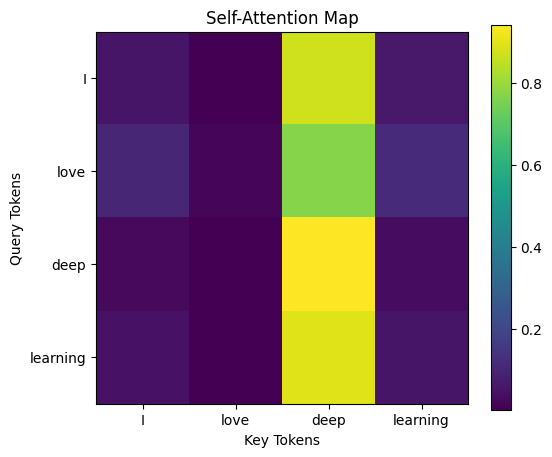

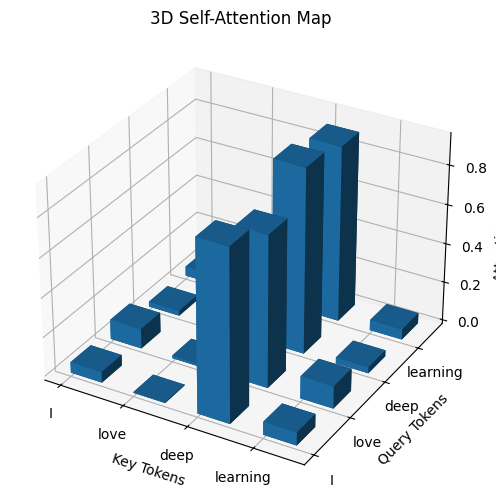

In [12]:
#question 4
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import math

# -------------------------------
# Sample tokens and embeddings
# -------------------------------
tokens = ["I", "love", "deep", "learning"]
seq_len = len(tokens)
embed_dim = 8

torch.manual_seed(0)
X = torch.rand(seq_len, embed_dim)

# -------------------------------
# Q, K, V projections
# -------------------------------
W_Q = torch.rand(embed_dim, embed_dim)
W_K = torch.rand(embed_dim, embed_dim)
W_V = torch.rand(embed_dim, embed_dim)

Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# -------------------------------
# Scaled Dot-Product Attention
# -------------------------------
scores = torch.matmul(Q, K.T) / math.sqrt(embed_dim)
attention_weights = F.softmax(scores, dim=-1)
output = torch.matmul(attention_weights, V)

# -------------------------------
# Visualization
# -------------------------------
plt.figure(figsize=(6, 5))
plt.imshow(attention_weights.detach().numpy(), cmap="viridis")
plt.colorbar()

plt.xticks(range(seq_len), tokens)
plt.yticks(range(seq_len), tokens)

plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.title("Self-Attention Map")

plt.show()
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# -------------------------------
# 3D Visualization of Attention Weights
# -------------------------------
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

num_queries, num_keys = attention_weights.shape

x_pos, y_pos = np.meshgrid(
    np.arange(num_keys),
    np.arange(num_queries)
)

x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

dx = dy = 0.5
dz = attention_weights.detach().numpy().flatten()

ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)

ax.set_xticks(range(num_keys))
ax.set_yticks(range(num_queries))
ax.set_xticklabels(tokens)
ax.set_yticklabels(tokens)

ax.set_xlabel("Key Tokens")
ax.set_ylabel("Query Tokens")
ax.set_zlabel("Attention Weight")
ax.set_title("3D Self-Attention Map")

plt.show()


In [8]:
#question 5
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import random

# -------------------------------
# Multi-Head Attention with Head Masking
# -------------------------------
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.W_Q = nn.Linear(embed_dim, embed_dim, bias=False)
        self.W_K = nn.Linear(embed_dim, embed_dim, bias=False)
        self.W_V = nn.Linear(embed_dim, embed_dim, bias=False)
        self.fc = nn.Linear(embed_dim, embed_dim)

    def forward(self, x, head_mask=None):
        B, T, _ = x.shape

        Q = self.W_Q(x)
        K = self.W_K(x)
        V = self.W_V(x)

        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attn = F.softmax(scores, dim=-1)
        out = torch.matmul(attn, V)

        # Mask selected heads
        if head_mask is not None:
            out = out * head_mask.view(1, -1, 1, 1)

        out = out.transpose(1, 2).contiguous().view(B, T, self.embed_dim)
        return self.fc(out)


# -------------------------------
# Simple Classifier Model
# -------------------------------
class ToyModel(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        self.attn = MultiHeadAttention(embed_dim, num_heads)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, 2)

    def forward(self, x, head_mask=None):
        x = self.attn(x, head_mask)
        x = self.pool(x.transpose(1, 2)).squeeze(-1)
        return self.fc(x)


# -------------------------------
# Dummy Dataset
# -------------------------------
def generate_data(n=200):
    X = torch.rand(n, 6, 8)
    y = torch.tensor([random.randint(0, 1) for _ in range(n)])
    return X, y

X, y = generate_data()
model = ToyModel(embed_dim=8, num_heads=2)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

# -------------------------------
# Train Model
# -------------------------------
for _ in range(50):
    optimizer.zero_grad()
    preds = model(X)
    loss = loss_fn(preds, y)
    loss.backward()
    optimizer.step()

# -------------------------------
# Accuracy Function
# -------------------------------
def accuracy(model, head_mask=None):
    with torch.no_grad():
        preds = model(X, head_mask)
        return (preds.argmax(dim=1) == y).float().mean().item()

# -------------------------------
# Head Importance Analysis
# -------------------------------
baseline_acc = accuracy(model)
print("Baseline Accuracy:", baseline_acc)

for h in range(2):
    mask = torch.ones(2)
    mask[h] = 0   # remove one head
    acc = accuracy(model, mask)
    print(f"Accuracy after removing Head {h+1}: {acc}")


Baseline Accuracy: 0.6150000095367432
Accuracy after removing Head 1: 0.6399999856948853
Accuracy after removing Head 2: 0.6349999904632568


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

# -------------------------------
# Multi-Head Self-Attention
# -------------------------------
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()
        assert embed_dim % num_heads == 0

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads

        self.W_Q = nn.Linear(embed_dim, embed_dim, bias=False)
        self.W_K = nn.Linear(embed_dim, embed_dim, bias=False)
        self.W_V = nn.Linear(embed_dim, embed_dim, bias=False)
        self.fc_out = nn.Linear(embed_dim, embed_dim)

    def forward(self, x):
        B, T, _ = x.shape

        Q = self.W_Q(x)
        K = self.W_K(x)
        V = self.W_V(x)

        Q = Q.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        K = K.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)
        V = V.view(B, T, self.num_heads, self.head_dim).transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        attention = F.softmax(scores, dim=-1)

        out = torch.matmul(attention, V)
        out = out.transpose(1, 2).contiguous().view(B, T, self.embed_dim)

        return self.fc_out(out)


# -------------------------------
# Feed Forward Network
# -------------------------------
class FeedForward(nn.Module):
    def __init__(self, embed_dim, expansion=4):
        super().__init__()
        self.fc1 = nn.Linear(embed_dim, embed_dim * expansion)
        self.fc2 = nn.Linear(embed_dim * expansion, embed_dim)

    def forward(self, x):
        return self.fc2(F.relu(self.fc1(x)))


# -------------------------------
# Transformer Encoder Block
# -------------------------------
class TransformerEncoderBlock(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super().__init__()

        self.attention = MultiHeadAttention(embed_dim, num_heads)
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

        self.ffn = FeedForward(embed_dim)

    def forward(self, x):
        # Self-Attention + Add & Norm
        attn_out = self.attention(x)
        x = self.norm1(x + attn_out)

        # Feed Forward + Add & Norm
        ffn_out = self.ffn(x)
        x = self.norm2(x + ffn_out)

        return x


# -------------------------------
# Example Run
# -------------------------------
batch_size = 1
seq_len = 6
embed_dim = 8
num_heads = 2

x = torch.rand(batch_size, seq_len, embed_dim)

encoder = TransformerEncoderBlock(embed_dim, num_heads)
output = encoder(x)

print("Encoder Output Shape:", output.shape)


Encoder Output Shape: torch.Size([1, 6, 8])


In [10]:
import torch
import torch.nn as nn
import math

# -------------------------------
# Sinusoidal Positional Encoding
# -------------------------------
class SinusoidalPositionalEncoding(nn.Module):
    def __init__(self, seq_len, embed_dim):
        super().__init__()
        pe = torch.zeros(seq_len, embed_dim)

        for pos in range(seq_len):
            for i in range(0, embed_dim, 2):
                pe[pos, i] = math.sin(pos / (10000 ** (i / embed_dim)))
                if i + 1 < embed_dim:
                    pe[pos, i + 1] = math.cos(pos / (10000 ** (i / embed_dim)))

        self.register_buffer("pe", pe)

    def forward(self, x):
        # x shape: (batch, seq_len, embed_dim)
        return x + self.pe.unsqueeze(0)


# -------------------------------
# Learned Positional Embedding
# -------------------------------
class LearnedPositionalEmbedding(nn.Module):
    def __init__(self, seq_len, embed_dim):
        super().__init__()
        self.pos_embedding = nn.Embedding(seq_len, embed_dim)

    def forward(self, x):
        batch_size, seq_len, _ = x.shape
        positions = torch.arange(seq_len).unsqueeze(0).repeat(batch_size, 1)
        return x + self.pos_embedding(positions)


# -------------------------------
# Experiment Setup
# -------------------------------
batch_size = 1
seq_len = 6
embed_dim = 8

torch.manual_seed(0)
x = torch.rand(batch_size, seq_len, embed_dim)

sinusoidal_pe = SinusoidalPositionalEncoding(seq_len, embed_dim)
learned_pe = LearnedPositionalEmbedding(seq_len, embed_dim)

x_sinusoidal = sinusoidal_pe(x)
x_learned = learned_pe(x)

# -------------------------------
# Comparison
# -------------------------------
print("Original Embeddings:\n", x)
print("\nAfter Sinusoidal Positional Encoding:\n", x_sinusoidal)
print("\nAfter Learned Positional Embedding:\n", x_learned)

print("\nDifference (Sinusoidal - Original):\n", x_sinusoidal - x)
print("\nDifference (Learned - Original):\n", x_learned - x)


Original Embeddings:
 tensor([[[0.4963, 0.7682, 0.0885, 0.1320, 0.3074, 0.6341, 0.4901, 0.8964],
         [0.4556, 0.6323, 0.3489, 0.4017, 0.0223, 0.1689, 0.2939, 0.5185],
         [0.6977, 0.8000, 0.1610, 0.2823, 0.6816, 0.9152, 0.3971, 0.8742],
         [0.4194, 0.5529, 0.9527, 0.0362, 0.1852, 0.3734, 0.3051, 0.9320],
         [0.1759, 0.2698, 0.1507, 0.0317, 0.2081, 0.9298, 0.7231, 0.7423],
         [0.5263, 0.2437, 0.5846, 0.0332, 0.1387, 0.2422, 0.8155, 0.7932]]])

After Sinusoidal Positional Encoding:
 tensor([[[ 0.4963,  1.7682,  0.0885,  1.1320,  0.3074,  1.6341,  0.4901,
           1.8964],
         [ 1.2971,  1.1726,  0.4487,  1.3967,  0.0323,  1.1688,  0.2949,
           1.5185],
         [ 1.6070,  0.3839,  0.3597,  1.2623,  0.7016,  1.9150,  0.3991,
           1.8742],
         [ 0.5605, -0.4371,  1.2483,  0.9915,  0.2152,  1.3730,  0.3081,
           1.9320],
         [-0.5809, -0.3838,  0.5401,  0.9528,  0.2481,  1.9290,  0.7271,
           1.7423],
         [-0.4326,  0